# **Life Expectancy and GDP**
The project will focus on the EDA (Exploratory Data Analysis) of a dataset from *World Health Organization* and the *World Bank* to try and identify the relationship between the GDP and life expectancy of six countries.

First, lets define the main terms of the project:
- **GDP (Gross Domestic Product):**  is a monetary measure of the market value of all the final goods and services produced in a specific time period by a country or countries.
- **Live Expectancy:** is a statistical measure of the estimate of the span of a life.

Now, lets load the data to make a first aproach to the information that contains.

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
data = pd.read_csv('./data/all_data.csv')

# See summary
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [4]:
# Data optimization
data.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'live_expectancy', 'GDP': 'gdp'}, inplace = True)

# Change datatype of `country` to string
data.country = data.country.astype('string')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     string 
 1   year             96 non-null     int64  
 2   live_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), string(1)
memory usage: 3.1 KB
None


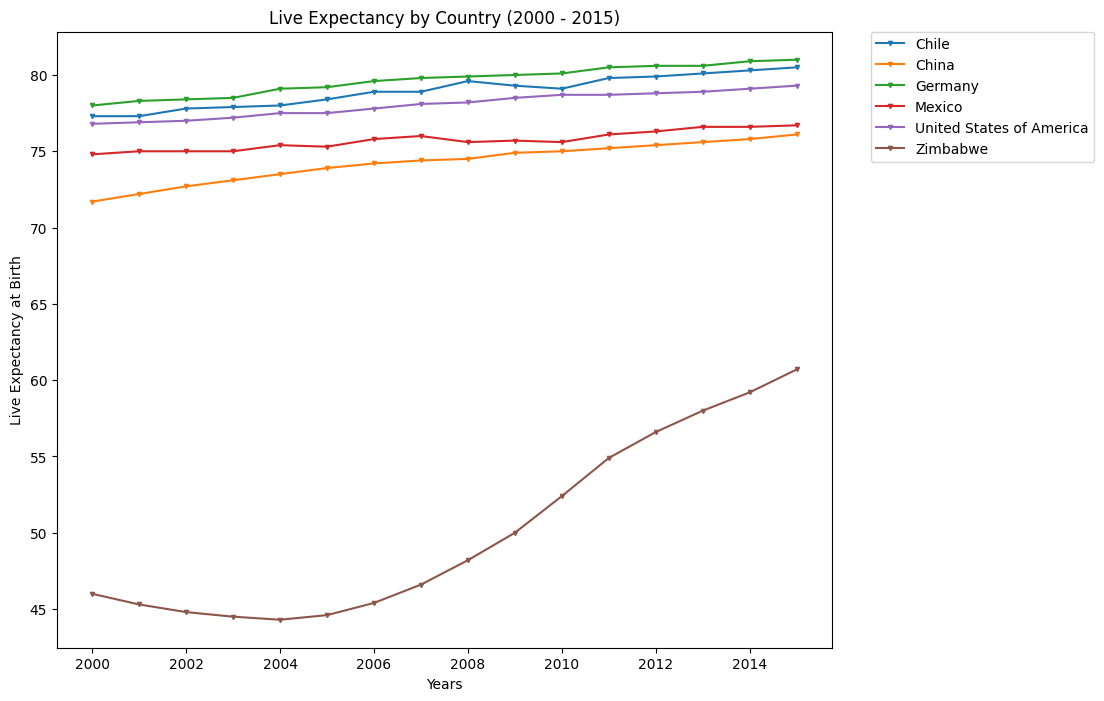

<Figure size 640x480 with 0 Axes>

In [5]:
# Lists of variables
countries = data.country.unique()
years = data.year.unique()

# Live expectancy evolution by country.
plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

for i in countries:
    plt.plot(data.year[data.country == i], data.live_expectancy[data.country == i], marker = 'v', ms = 3)

plt.xlabel('Years')
plt.ylabel('Live Expectancy at Birth')
plt.title('Live Expectancy by Country (2000 - 2015)')
plt.legend(countries, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()
plt.clf()

We can see that exist a big difference between life expectancy in Zimbabwe and the other countries. The rest of the lines evolve really similar between 2000 and 2015, but Zimbabwe rises faster since 2005. It can be interesting to represent the difference between the mean live expectancy of Zimbabwe and the rest.

We also see that life expectancy

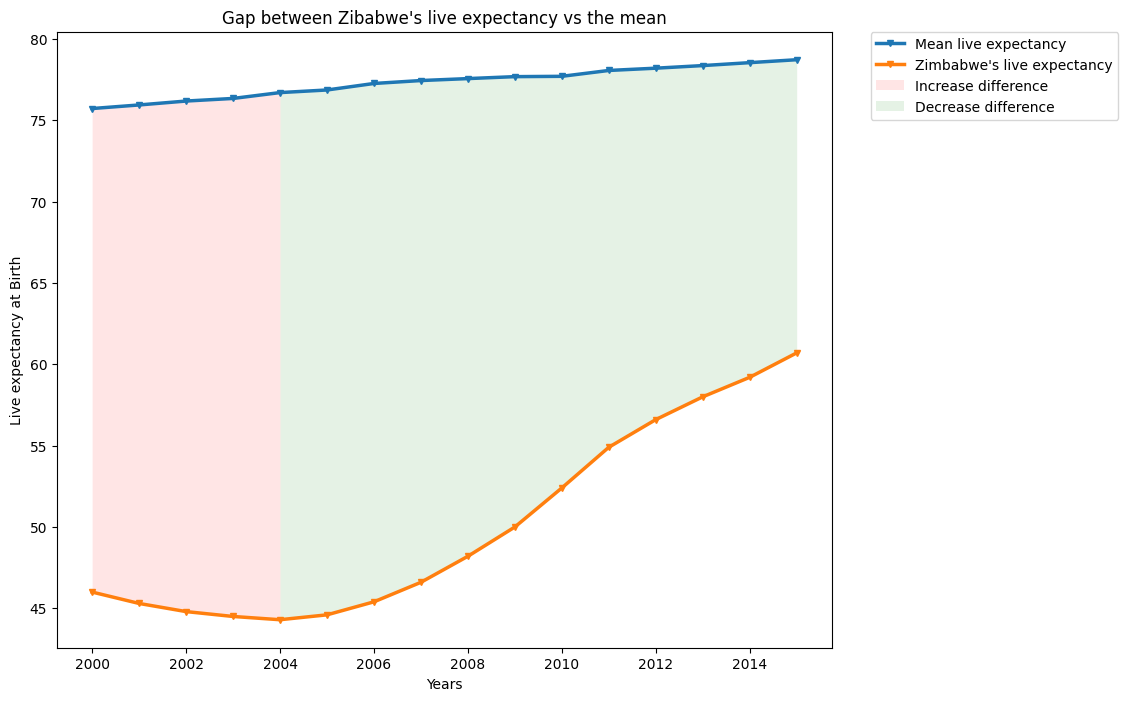

<Figure size 640x480 with 0 Axes>

In [6]:
# Mean live expectancy except Zimbabwe
countries_no_Zimbabwe = data.drop(data[data.country == 'Zimbabwe'].index, axis=0)
mean_live_expec = countries_no_Zimbabwe.groupby('year').live_expectancy.mean()

# Line Graph
plt.figure(figsize=(10,8))
ax = plt.subplot(1, 1, 1)
# Mean live expectancy other countries
plt.plot(mean_live_expec, label = 'Mean live expectancy', linewidth = 2.5,  marker = 'v', ms = 5)
# Live expectancy Zimbabwe
plt.plot(data.year[data.country == 'Zimbabwe'], data.live_expectancy[data.country == 'Zimbabwe'], label = 'Zimbabwe\'s live expectancy', linewidth = 2.5,  marker = 'v', ms = 5)

#  More difference
ax.fill_between(x = years, y1=mean_live_expec, y2=data.live_expectancy[data.country == 'Zimbabwe']\
    , linewidth = 0, label = 'Increase difference', where = years <= 2004, alpha = 0.1, color = 'red')
# Less difference
ax.fill_between(x = years, y1=mean_live_expec, y2=data.live_expectancy[data.country == 'Zimbabwe']\
    , linewidth = 0, label = 'Decrease difference', where = years >= 2004, alpha = 0.1, color = 'green')

plt.xlabel('Years')
plt.ylabel('Live expectancy at Birth')
plt.title('Gap between Zibabwe\'s live expectancy vs the mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()
plt.clf()

With this graph we can see more clearly how the distance between the average live expected and the one of Zimbabwe is getting closer after 2004. It can be intereting to study what change since 2004 in Zimbabwe to improve their live expectancy so fast.

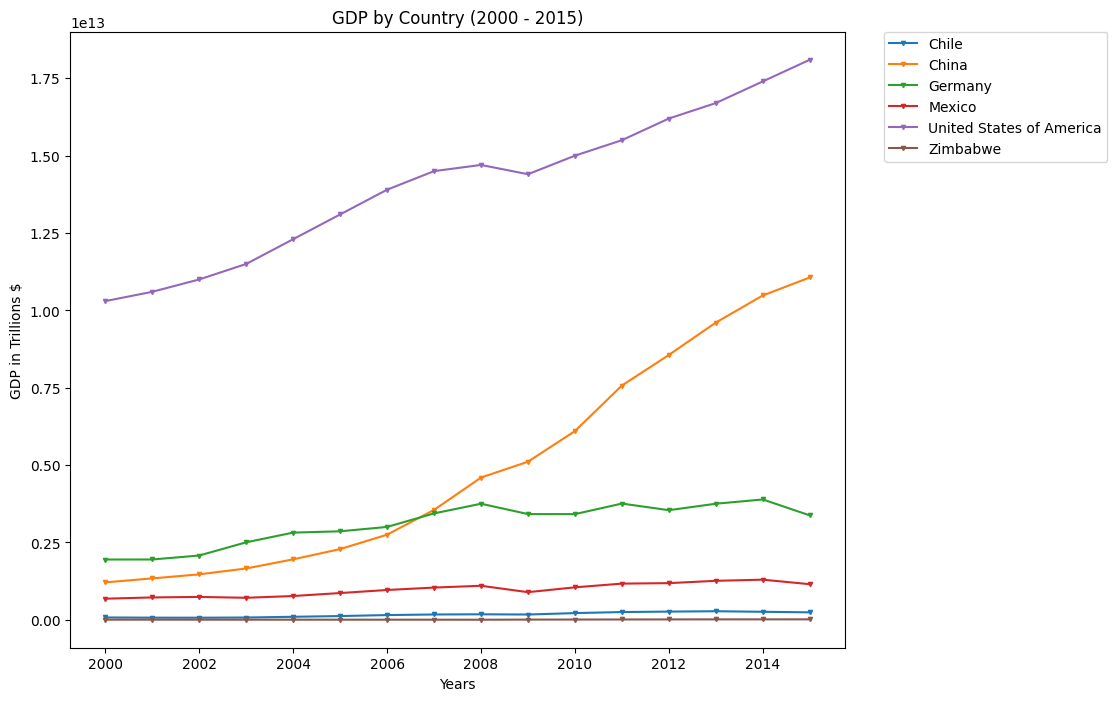

<Figure size 640x480 with 0 Axes>

In [7]:
# GDP evolution by country.
plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

for i in countries:
    plt.plot(data.year[data.country == i], data.gdp[data.country == i], marker = 'v', ms = 3)

plt.xlabel('Years')
plt.ylabel('GDP in Trillions $')
plt.title('GDP by Country (2000 - 2015)')
plt.legend(countries, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()
plt.clf()

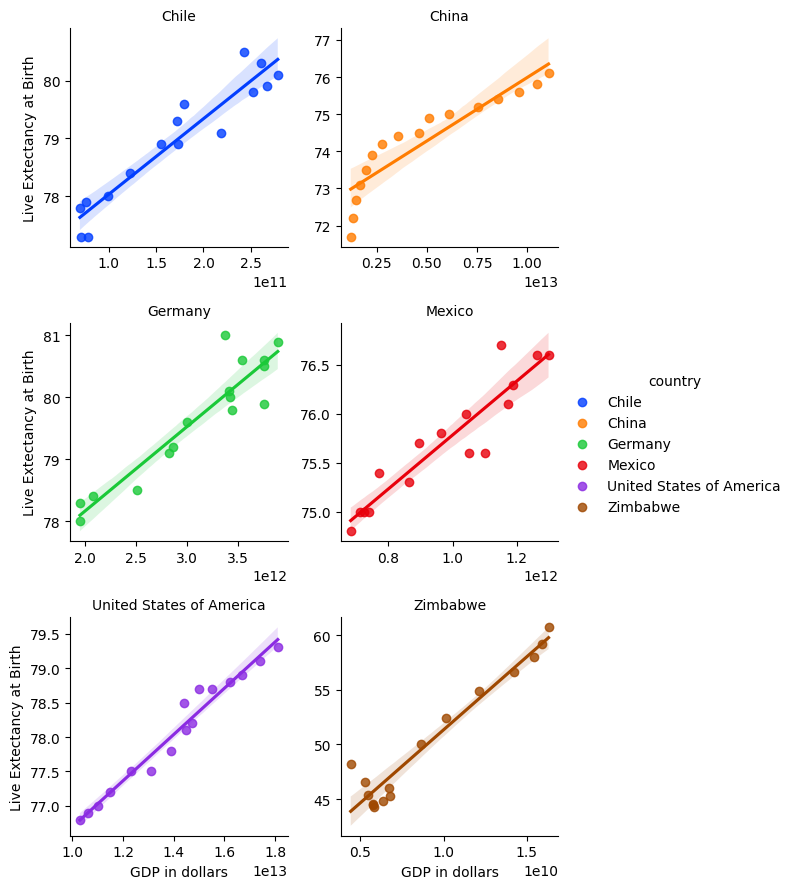

<Figure size 640x480 with 0 Axes>

In [18]:
# Correlation between GPD and Live Expectancy

corr_graphs = sns.FacetGrid(data = data, col='country', col_wrap=2, hue='country', palette='bright', sharex=False, sharey=False)
corr_graphs.map(sns.regplot, 'gdp', 'live_expectancy', marker = 'o')
corr_graphs.set_axis_labels(x_var='GDP in dollars', y_var='Live Extectancy at Birth')
corr_graphs.set_titles('{col_name}')
corr_graphs.add_legend()

plt.show()
plt.clf()

Analazing this graphs, we can conclude that exists a strong relationship between GDP and Live Expectancy in every country.